# Assignment 1 Scientific Computing 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numba 
from matplotlib.animation import FuncAnimation
import os
import pickle as pkl
from IPython.display import HTML

In [2]:
import src.solutions as solutions
import src.visualizations as visualizations


In [3]:
colors = ["orange", "blue", "green", "purple", "brown"]

## Part 1

first draft on assignment 1a, wrote it as an iterative scheme over time and space, saving the two previous time values for the computation of the next time point

The discretized wave equation becomes (with functions from solutions): 

time_approx_1a(deltat, time, func, x) = c^2* spat_approx_1a(deltax, time, func, x, L)

you can rewrite this to get the values of the next time point

### B

Euler's method 

f_x+1 = f_x + h * f'_x

(c*delta t)/delta x < 1 for stable computation 
looking at this method, you can derive that in the first two time-points, the function follows the exact same curve as the derivative (f'_x) is 0

### Plotted snapshots of the wave at different times

In [ ]:
#choose out of options 1, 2 or 3

L = 1
N = 100
c = 1
deltat= 0.001
iterations = 30000
overall_solutions=[]
for i in range(3):
    overall_solution, xs = solutions.one_b_wrapper(i+1, L, N, c, deltat, iterations)
    overall_solutions.append(overall_solution)

visualizations.visualization_1b(overall_solutions, xs)

### Wave Animation 

In [ ]:
# initial values for the wave equation 
visualizations.animate_1c(L, N, c, deltat)


The equations for the boundaries:

c^(k+1)_(0, j) = 1 -> top row <br>
c^(k+1)_(N-1, j) = 0 -> bottom row <br>
c^(k+1)_(i, 0) = c^(k+1)_(i, N - 2) -> first column <br>
c^(k+1)_(i, -1) = c^(k+1)_(i, 1) -> last column <br>

## Diffusion

In [4]:
# values used for initial diffusion setup 
# main parameter values (for discretization)
N = 100
L = 1.0
D = 1

# setp sizes
dx = L / N
dt = 0.25 * dx**2

# initial setup
gamma = (D * dt) / (dx**2) #what is this gamma
num_steps = int(1.0/ dt)
y_values = np.linspace(0, 1, N)
c = solutions.initialize_grid(N)

par_values = (c, num_steps, N, gamma, dt)

#### Comparison analytical with numerical solution

In [ ]:

# parse data and check directory layout and file existence or create new data
create_new_data = False
data_file = "2D_diffusion.pkl"
all_c, times = solutions.check_and_parse_data(data_file, create_new_data, par_values)

# visualize the data together with analytical solution. 
# visualizations.plot_analytical_solution(y_values, all_c, times, D)
visualizations.plot_analytical_solution(y_values, all_c, times, D)
# t values 0, 0.001, 0.01, 0.1, 1.0
visualizations.plot_five_states(all_c, times)

### Snapshot of 5 Diffusion configurations 

In [ ]:

# data parsing/generation 
data_file = "2D_diffusion_comparison.pkl"
create_new_data = False
all_c, times = solutions.check_and_parse_data(data_file, create_new_data, par_values)

# visualizations.plot_simulation_without_animation(all_c, N)

# animation 
%matplotlib inline
anim = visualizations.animate_2f(solutions.update, c, num_steps, N, gamma, dt)
HTML(anim.to_jshtml())

I

Show how the convergence measure δ in eq. (14) depends on the number
 of iterations k for each of the methods. A log-lin plot may be suitable. For SOR,
 choose a few representative values for ω.

In [4]:
# parameters
p_values = np.arange(1, 10)
omegas = [1, 1.5]
N = 50
max_iters = 10000
omega_range = np.arange(1.7, 2.0, 0.05)
N_values = [10, 20, 50, 100]


AttributeError: 'list' object has no attribute 'items'

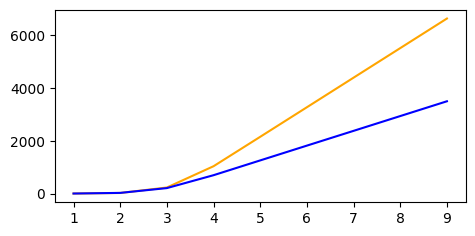

In [ ]:
iterations_jacobi = [solutions.sequential_jacobi(N=N, tol=10.0**-p, max_iters=max_iters) for p in p_values]
iterations_gauss_seidel = [solutions.sequential_gauss_seidel(N=N, tol=10.0**-p, max_iters=max_iters) for p in p_values]

for omega in omegas:
    iterations_sor = [solutions.sequential_SOR(N=N, tol=10.0**-p, max_iters=max_iters, omega=omega) for p in p_values]

visualizations.visualization_1i(p_values, iterations_jacobi, iterations_gauss_seidel, iterations_sor, colors)

J 

In the SOR method, find the optimal ω. How does it depend on N?.

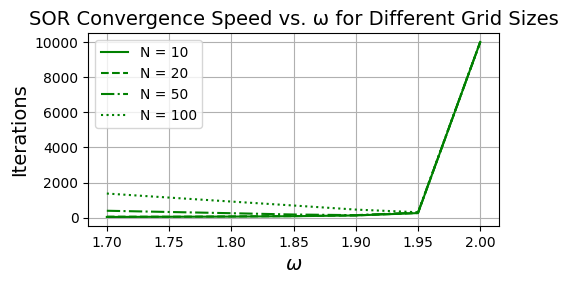

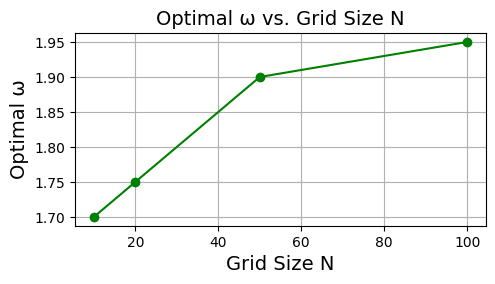

In [9]:
optimal_omegas = []
iters_N = {}

for N in N_values:
    best_omega = None
    min_iters = float('inf')

    iters_omega = []

    for omega in omega_range:
        iters = solutions.sequential_SOR(N=N, tol=1e-6, max_iters=max_iters, omega=omega)

        iters_omega.append(iters)

        if iters < min_iters:
            min_iters = iters
            best_omega = omega

    optimal_omegas.append(best_omega)
    iters_N[N] = iters_omega

visualizations.visualization_1j_omega_iters(iters_N, omega_range, colors=colors)
visualizations.visualization_1j_N_omegas(N_values, optimal_omegas, colors=colors)

In [ ]:
def visualization_1i(p_values, iterations_gauss_seidel, colors):

    plt.figure(figsize=(5.3, 2.5))
    
    linestyles = ['-', '--', '-.', ':']
    num_styles = len(linestyles)

    plt.plot(p_values, iterations_jacobi, color=colors[0], label="Jacobi")
    plt.plot(p_values, iterations_gauss_seidel, color=colors[1], label="Gauss-Seidel")

    for i, (omega, sor_iterations) in enumerate(iterations_sor.items()):
        plt.plot(p_values, sor_iterations, label=f"SOR (ω={omega})", color=colors[2], linestyle=linestyles[i % num_styles])

    # plt.plot(p_values, iterations_sor, color=colors[2], label="Successive Over Relaxation")
    plt.xlabel(r'$p$', fontsize=14)
    plt.ylabel('Iterations', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=10, loc="upper left")
    plt.grid(True)
    plt.title("Convergence Measure vs. Iterations")
    plt.savefig("plots/fig_1i.png", dpi=300, bbox_inches="tight")
    plt.show()


In [6]:
def place_objects(N, num_object, seed=31, size_object=4):
    object_grid = np.zeros((N,N))
    np.random.seed(seed)
    
    for _ in range(num_object):

        # staying within range of the grid, + not occupying border cell -> border conditions
        x,y = np.random.randint(1, N - size_object, size=2)
        points = [(x+j, y+k) for j in range(size_object) for k in range(size_object)]
        object_grid[tuple(zip(*points))] = 1

    return object_grid 

def initialize_grid(N):
    grid = np.zeros((N, N))

    grid[0, :] = 0  # bottom boundary
    grid[N - 1, :] = 1  # top boundary

    return grid


def apply_periodic_boundary(grid):
    grid[:, 0] = grid[:, -2]
    grid[:, -1] = grid[:, 1]


def sequential_SOR(N, tol, max_iters, omega, object_grid=None):
    """
    Solves using the Successive Over Relaxtion (SOR) iteration method.
    
    The update equation is:
        c_{i,j}^{k+1} = (omega/4) * (c_{i+1,j}^{k} + c_{i,j+1}^{k} + c_{i,j+1}^{k} + (1 - omega) c_{i,j}^{k})
    
    Parameters:
        N (int): Grid size.
        tol (float): Convergence tolerance.
        max_iters (int): Maximum number of iterations.
        omega (float): Relaxation factor.

    Returns:
        int: Number of iterations required to reach convergence.
    """

    # grid initialisation
    c = initialize_grid(N)

    iter = 0
    delta = float('inf')

    while delta > tol and iter < max_iters:
        delta = 0

        for i in range(1, N-1):  # periodic in x
            for j in range(1, N-1):  # fixed in y
                
                # if an grid point lies within the object 
                if object_grid is not None and object_grid[(i, j)]:
                    c_next = 0
                    continue
                
                # periodic boundary conditions
                west = c[i - 1, j] if i > 0 else c[N - 1, j]
                east = c[i + 1, j] if i < N - 1 else c[0, j]
                south = c[i, j - 1] if j > 0 else 0
                north = c[i, j + 1] if j < N - 1 else 1
                
                # SOR update equation
                c_next = (omega / 4) * (west + east + south + north) + (1 - omega) * c[i, j]

                delta = max(delta, abs(c_next - c[i, j]))
                c[i, j] = c_next

        iter += 1

    return iter

### Create Object Grids

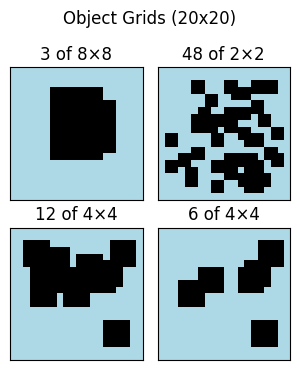

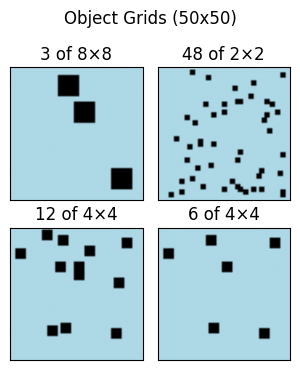

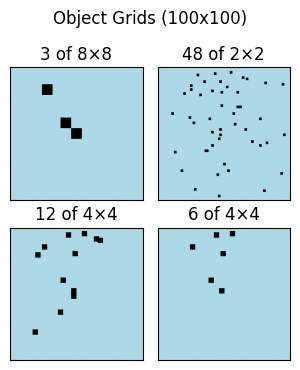

In [9]:
def create_object_layouts(N, object_configs, num_grids=10):
    
    object_gridjes = []
    for num_objects, size in object_configs:
        seedje = 30
        object_grids_sub = []
        for _ in range(num_grids):
            object_grids_sub.append(place_objects(N, num_objects, seedje, size))
            seedje+=1
        object_gridjes.append(object_grids_sub)
    return object_gridjes
    

object_configs = [
    (3, 8),   # 3 objects of size 8x8
    (48, 2),  # 48 objects of size 2x2
    (12, 4),  # 12 objects of size 4x4
    (6, 4)   # 6 objects of size 4x4
]
num_grids = 10
sizes = [
        "3 of 8×8",
        "48 of 2×2",
        "12 of 4×4",
        "6 of 4×4", 
        "0 of 0x0"
    ]

all_grids = dict()

for N in N_values:
    # skip if N is smaller than 20, than the objects are too big in contrast to the gridsizes
    if N <20:
        continue
    object_grids = create_object_layouts(N, object_configs, num_grids)
    all_grids[N] = object_grids
    # take an examplatory grid to visualize
    visualizations.visualize_object_grid(object_grids, sizes)


In [28]:
def object_per_gridsize(all_grids, null_measure, config_labels, sizes, colors):
    plt.figure(figsize=(4, 2.5))

    grids = sorted(all_grids.keys())  # Ensure grid sizes are sorted
    
    # Iterate over each object configuration and plot a separate line
    for i, config_label in enumerate(config_labels):
        means = []
        vartjes = []

        for grid_size in grids:
            config_data = all_grids[grid_size]  # Get the dictionary for this grid size
            means.append(config_data[config_label][0])  # Mean value
            vartjes.append(config_data[config_label][1])  # Variance value

        # Plot line for this configuration
        plt.plot(grids, means, label=f"{sizes[i]}", marker="o", color=colors[i])

        # Plot variance as a shaded region
        plt.fill_between(grids, 
                         np.array(means) - np.array(np.sqrt(vartjes)), 
                         np.array(means) + np.array(np.sqrt(vartjes)), 
                         alpha=0.2, color=colors[i])

    # Plot null measure for reference
    plt.plot(grids, null_measure, '--', label=f"{sizes[-1]}", color="black")
    # plt.yscale("log")
    # Labels and legend
    plt.xlabel("Grid Size")
    plt.ylabel("Iterations")
    plt.legend()
    plt.title("Convergence on Object Grid")
    plt.show()


In [ ]:
from multiprocessing import Pool
tol = 1e-6 #default tol
omegatje = 1.8 #default omega
PROCESSES = 10

def generate_grid_results(N_values, all_grids, num_grids, max_iters, omegatje, tol):
    all_results = dict()
    zeros_metric =[]
    
    # iterate over all grid-sizes
    for ntje in N_values:
        print(f"starting SOR for grid size {ntje}x{ntje}")
        if ntje <20:
            continue
        result_config = dict()
        # loop over different object grid configurations (object sizes)
        for config in range(len(all_grids[ntje])):
            # itertjes = []
            # loop over the number of grids per grid-setting (parallel implementation)
            pars = []
            
            for run in range(num_grids):
                pars.append((ntje, tol, max_iters, omegatje, all_grids[ntje][config][run]))

            # parallelizaiton
            with Pool(PROCESSES) as pool:
                assert PROCESSES < os.cpu_count(), "Lower the number of processes (PROCESSES)"
                print(f"Starting parallel execution of the grid {ntje} *{ntje} and configuration {config}")
                itertjes = pool.map(solutions.non_sequential_SOR, pars)

            # calculate mean and variance, save for every grid size and object configuration
            mean_config = np.mean(itertjes)
            var_config = np.var(itertjes)
            result_config[object_configs[config]] = (mean_config, var_config)
        all_results[ntje] = result_config
    
        # a null-measure: with no objects on the grid
        zeros_metric.append(sequential_SOR(ntje,tol, max_iters,omegatje))
    return all_results, zeros_metric

# get the mean, variance of every grid size for every object configuration
all_results, null_metric = generate_grid_results(N_values, all_grids, num_grids, max_iters, omegatje, tol)


starting SOR for grid size 10x10
starting SOR for grid size 20x20
Starting parallel execution of the grid 20 *20 and configuration 0
Starting parallel execution of the grid 20 *20 and configuration 1
Starting parallel execution of the grid 20 *20 and configuration 2
Starting parallel execution of the grid 20 *20 and configuration 3
starting SOR for grid size 50x50
Starting parallel execution of the grid 50 *50 and configuration 0
Starting parallel execution of the grid 50 *50 and configuration 1
Starting parallel execution of the grid 50 *50 and configuration 2
Starting parallel execution of the grid 50 *50 and configuration 3
starting SOR for grid size 100x100
Starting parallel execution of the grid 100 *100 and configuration 0
Starting parallel execution of the grid 100 *100 and configuration 1
Starting parallel execution of the grid 100 *100 and configuration 2
Starting parallel execution of the grid 100 *100 and configuration 3


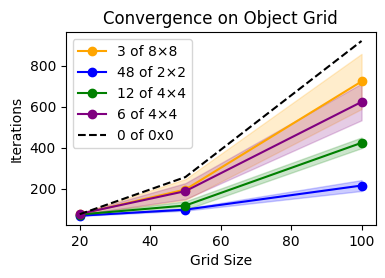

for gridsize 20:
for configuration (3, 8), mean: 76.5, var:14.05
for configuration (48, 2), mean: 68.7, var:1.61
for configuration (12, 4), mean: 74.4, var:5.839999999999999
for configuration (6, 4), mean: 77.8, var:11.76
for gridsize 50:
for configuration (3, 8), mean: 196.3, var:2606.41
for configuration (48, 2), mean: 98.2, var:23.96
for configuration (12, 4), mean: 118.3, var:420.41
for configuration (6, 4), mean: 188.5, var:1516.05
for gridsize 100:
for configuration (3, 8), mean: 722.8, var:18048.36
for configuration (48, 2), mean: 215.7, var:704.4100000000001
for configuration (12, 4), mean: 423.8, var:677.1600000000001
for configuration (6, 4), mean: 623.1, var:7997.089999999999


In [29]:

object_per_gridsize(all_results, null_metric, object_configs, sizes, colors)

for res, val in all_results.items():
    print(f"for gridsize {res}:")
    for config, (mean, var) in val.items():
        print(f"for configuration {config}, mean: {mean}, var:{var}")